<a href="https://www.kaggle.com/code/jakubwalczykowski/disaster-tweets?scriptVersionId=122490775" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install emot
!pip install symspellpy

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61.5/61.5 kB 2.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.6/2.6 MB 25.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 125.5/125.5 kB 10.1 MB/s eta 0:00:00


In [2]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns



import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import pkg_resources
from symspellpy import SymSpell, Verbosity
import string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import re
import pickle
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


# 1. Data upload and short EDA

In [3]:
train_df = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test_df = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
sub_df = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')
train_df

id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1  
7611  Police investigating after an e-bike collided ...       1  
7612  The Latest: More Homes Razed by Northern Calif...       1  

[7613 rows x 5 columns]

<AxesSubplot:>

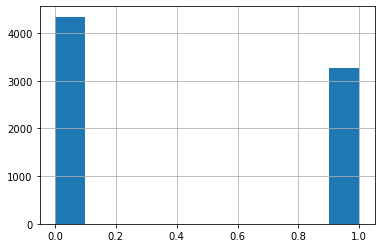

In [4]:
train_df['target'].hist()

In [5]:
train_df.head(10)

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   
5   8     NaN      NaN  #RockyFire Update => California Hwy. 20 closed...   
6  10     NaN      NaN  #flood #disaster Heavy rain causes flash flood...   
7  13     NaN      NaN  I'm on top of the hill and I can see a fire in...   
8  14     NaN      NaN  There's an emergency evacuation happening now ...   
9  15     NaN      NaN  I'm afraid that the tornado is coming to our a...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [8]:
def visualize(label):
  words = ''
  for msg in train_df[train_df['target'] == label]['text']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

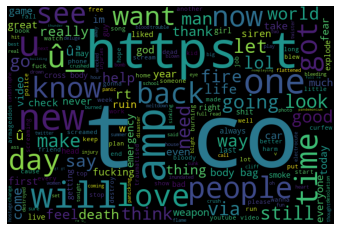

In [9]:
#non-disaster tweets before preprocesing
visualize(0)

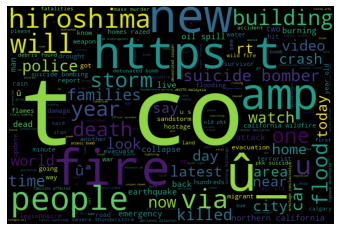

In [10]:
#disaster tweets before preprocesing
visualize(1)

In [11]:
train_df[train_df["target"] == 0]["text"].values[0]

"What's up man?"

In [12]:
train_df[train_df["target"] == 1]["text"].values[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [13]:
sub_df.head()

id  target
0   0       0
1   2       0
2   3       0
3   9       0
4  11       0

# 2. Preprocessing 
most of preprocessing technic are by Rohit Garud https://www.kaggle.com/code/rohitgarud/all-almost-data-preprocessing-techniques-for-nlp#Final-Stopward-Removal  

In [14]:
#converting emojis
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text
train_df["text"] = train_df["text"].apply(convert_emojis)
test_df["text"] = test_df["text"].apply(convert_emojis)

In [15]:
#joining keywords with text      
train_df["keyword"] = train_df["keyword"].fillna("")
train_df["text"] = train_df["keyword"] + " " + train_df["text"]
test_df["keyword"] = test_df["keyword"].fillna("")
test_df["text"] = test_df["keyword"] + " " + test_df["text"]
train_df=train_df.drop(['keyword','location'],axis=1)
test_df=test_df.drop(['keyword','location'],axis=1)
train_df

id                                               text  target
0         1   Our Deeds are the Reason of this #earthquake ...       1
1         4             Forest fire near La Ronge Sask. Canada       1
2         5   All residents asked to 'shelter in place' are...       1
3         6   13,000 people receive #wildfires evacuation o...       1
4         7   Just got sent this photo from Ruby #Alaska as...       1
...     ...                                                ...     ...
7608  10869   Two giant cranes holding a bridge collapse in...       1
7609  10870   @aria_ahrary @TheTawniest The out of control ...       1
7610  10871   M1.94 [01:04 UTC]?5km S of Volcano Hawaii. ht...       1
7611  10872   Police investigating after an e-bike collided...       1
7612  10873   The Latest: More Homes Razed by Northern Cali...       1

[7613 rows x 3 columns]

In [16]:
#removing html code
def remove_html(text):
    soup = BeautifulSoup(text)
    text = soup.get_text()
    return text
train_df["text"] = train_df["text"].apply(remove_html)
test_df["text"] = test_df["text"].apply(remove_html)
train_df

/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


id                                               text  target
0         1  Our Deeds are the Reason of this #earthquake M...       1
1         4             Forest fire near La Ronge Sask. Canada       1
2         5  All residents asked to 'shelter in place' are ...       1
3         6  13,000 people receive #wildfires evacuation or...       1
4         7  Just got sent this photo from Ruby #Alaska as ...       1
...     ...                                                ...     ...
7608  10869  Two giant cranes holding a bridge collapse int...       1
7609  10870  @aria_ahrary @TheTawniest The out of control w...       1
7610  10871  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1
7611  10872  Police investigating after an e-bike collided ...       1
7612  10873  The Latest: More Homes Razed by Northern Calif...       1

[7613 rows x 3 columns]

In [17]:
#converting capital letters
train_df["text"] = train_df["text"].str.lower()
test_df["text"] = test_df["text"].str.lower()
train_df

id                                               text  target
0         1  our deeds are the reason of this #earthquake m...       1
1         4             forest fire near la ronge sask. canada       1
2         5  all residents asked to 'shelter in place' are ...       1
3         6  13,000 people receive #wildfires evacuation or...       1
4         7  just got sent this photo from ruby #alaska as ...       1
...     ...                                                ...     ...
7608  10869  two giant cranes holding a bridge collapse int...       1
7609  10870  @aria_ahrary @thetawniest the out of control w...       1
7610  10871  m1.94 [01:04 utc]?5km s of volcano hawaii. htt...       1
7611  10872  police investigating after an e-bike collided ...       1
7612  10873  the latest: more homes razed by northern calif...       1

[7613 rows x 3 columns]

In [18]:
#removing urls
def remove_urls(text):
    pattern = re.compile(r'https?://(www\.)?(\w+)(\.\w+)(/\w*)?')
    text = re.sub(pattern, "", text)
    return text
train_df["text"] = train_df["text"].apply(remove_urls)
test_df["text"] = test_df["text"].apply(remove_urls)
train_df

id                                               text  target
0         1  our deeds are the reason of this #earthquake m...       1
1         4             forest fire near la ronge sask. canada       1
2         5  all residents asked to 'shelter in place' are ...       1
3         6  13,000 people receive #wildfires evacuation or...       1
4         7  just got sent this photo from ruby #alaska as ...       1
...     ...                                                ...     ...
7608  10869  two giant cranes holding a bridge collapse int...       1
7609  10870  @aria_ahrary @thetawniest the out of control w...       1
7610  10871        m1.94 [01:04 utc]?5km s of volcano hawaii.        1
7611  10872  police investigating after an e-bike collided ...       1
7612  10873  the latest: more homes razed by northern calif...       1

[7613 rows x 3 columns]

In [19]:
#removing mentions
def remove_mentions(text):
    pattern = re.compile(r"@\w+")
    text = re.sub(pattern, "", text)
    return text
train_df["text"] = train_df["text"].apply(remove_mentions)
test_df["text"] = test_df["text"].apply(remove_mentions)
train_df

id                                               text  target
0         1  our deeds are the reason of this #earthquake m...       1
1         4             forest fire near la ronge sask. canada       1
2         5  all residents asked to 'shelter in place' are ...       1
3         6  13,000 people receive #wildfires evacuation or...       1
4         7  just got sent this photo from ruby #alaska as ...       1
...     ...                                                ...     ...
7608  10869  two giant cranes holding a bridge collapse int...       1
7609  10870    the out of control wild fires in california ...       1
7610  10871        m1.94 [01:04 utc]?5km s of volcano hawaii.        1
7611  10872  police investigating after an e-bike collided ...       1
7612  10873  the latest: more homes razed by northern calif...       1

[7613 rows x 3 columns]

In [20]:
#removing unicode chars
def remove_unicode_chars(text):
    text = text.encode("ascii", "ignore").decode()
    return text
train_df["text"] = train_df["text"].apply(remove_unicode_chars)
test_df["text"] = test_df["text"].apply(remove_unicode_chars)
train_df

id                                               text  target
0         1  our deeds are the reason of this #earthquake m...       1
1         4             forest fire near la ronge sask. canada       1
2         5  all residents asked to 'shelter in place' are ...       1
3         6  13,000 people receive #wildfires evacuation or...       1
4         7  just got sent this photo from ruby #alaska as ...       1
...     ...                                                ...     ...
7608  10869  two giant cranes holding a bridge collapse int...       1
7609  10870    the out of control wild fires in california ...       1
7610  10871        m1.94 [01:04 utc]?5km s of volcano hawaii.        1
7611  10872  police investigating after an e-bike collided ...       1
7612  10873  the latest: more homes razed by northern calif...       1

[7613 rows x 3 columns]

In [21]:
#removing punctuations
string.punctuation
def remove_punctuations(text):
    text = re.sub('[%s]' % re.escape(string.punctuation), " ",text)
    return text
train_df["text"] = train_df["text"].apply(remove_punctuations)
test_df["text"] = test_df["text"].apply(remove_punctuations)
train_df

id                                               text  target
0         1  our deeds are the reason of this  earthquake m...       1
1         4             forest fire near la ronge sask  canada       1
2         5  all residents asked to  shelter in place  are ...       1
3         6  13 000 people receive  wildfires evacuation or...       1
4         7  just got sent this photo from ruby  alaska as ...       1
...     ...                                                ...     ...
7608  10869  two giant cranes holding a bridge collapse int...       1
7609  10870    the out of control wild fires in california ...       1
7610  10871        m1 94  01 04 utc  5km s of volcano hawaii         1
7611  10872  police investigating after an e bike collided ...       1
7612  10873  the latest  more homes razed by northern calif...       1

[7613 rows x 3 columns]

In [22]:
#removing extra spaces
def remove_extra_spaces(text):
    text = re.sub(' +', ' ', text).strip()
    return text
train_df["text"] = train_df["text"].apply(remove_extra_spaces)
test_df["text"] = test_df["text"].apply(remove_extra_spaces)
train_df

id                                               text  target
0         1  our deeds are the reason of this earthquake ma...       1
1         4              forest fire near la ronge sask canada       1
2         5  all residents asked to shelter in place are be...       1
3         6  13 000 people receive wildfires evacuation ord...       1
4         7  just got sent this photo from ruby alaska as s...       1
...     ...                                                ...     ...
7608  10869  two giant cranes holding a bridge collapse int...       1
7609  10870  the out of control wild fires in california ev...       1
7610  10871            m1 94 01 04 utc 5km s of volcano hawaii       1
7611  10872  police investigating after an e bike collided ...       1
7612  10873  the latest more homes razed by northern califo...       1

[7613 rows x 3 columns]

In [23]:
#correcting spelling with symspell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt"
)
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
def correct_spelling_symspell(text):
    words = [
        sym_spell.lookup(
            word, 
            Verbosity.CLOSEST, 
            max_edit_distance=2,
            include_unknown=True
            )[0].term 
        for word in text.split()] 
    text = " ".join(words)
    return text
train_df["text"] = train_df["text"].apply(correct_spelling_symspell)
test_df["text"] = test_df["text"].apply(correct_spelling_symspell)
train_df

id                                               text  target
0         1  our deeds are the reason of this earthquake ma...       1
1         4              forest fire near la range sask canada       1
2         5  all residents asked to shelter in place are be...       1
3         6  of 000 people receive wildfires evacuation ord...       1
4         7  just got sent this photo from ruby alaska as s...       1
...     ...                                                ...     ...
7608  10869  two giant cranes holding a bridge collapse int...       1
7609  10870  the out of control wild fires in california ev...       1
7610  10871             my of of of etc pm a of volcano hawaii       1
7611  10872  police investigating after an a bike collided ...       1
7612  10873  the latest more homes razed by northern califo...       1

[7613 rows x 3 columns]

In [24]:
#Correcting Componded Words
bigram_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_bigramdictionary_en_243_342.txt"
)
sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2)
def correct_spelling_symspell_compound(text):
    words = [
        sym_spell.lookup_compound(
            word, 
            max_edit_distance=2
            )[0].term 
        for word in text.split()] 
    text = " ".join(words)
    return text
train_df["text"] = train_df["text"].apply(correct_spelling_symspell_compound)
test_df["text"] = test_df["text"].apply(correct_spelling_symspell_compound)
train_df

id                                               text  target
0         1  our deeds are the reason of this earthquake ma...       1
1         4              forest fire near la range sask canada       1
2         5  all residents asked to shelter in place are be...       1
3         6  of of a people receive wildfires evacuation or...       1
4         7  just got sent this photo from ruby alaska as s...       1
...     ...                                                ...     ...
7608  10869  two giant cranes holding a bridge collapse int...       1
7609  10870  the out of control wild fires in california ev...       1
7610  10871             my of of of etc pm a of volcano hawaii       1
7611  10872  police investigating after an a bike collided ...       1
7612  10873  the latest more homes razed by northern califo...       1

[7613 rows x 3 columns]

In [25]:
#removing stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
train_df["text"] = train_df["text"].apply(remove_stopwords)
test_df["text"] = test_df["text"].apply(remove_stopwords)
train_df

id                                               text  target
0         1       deeds reason earthquake may allah forgive us       1
1         4              forest fire near la range sask canada       1
2         5  residents asked shelter place notified officer...       1
3         6  people receive wildfires evacuation orders cal...       1
4         7  got sent photo ruby alaska smoke wildfires pou...       1
...     ...                                                ...     ...
7608  10869  two giant cranes holding bridge collapse nearb...       1
7609  10870  control wild fires california even northern pa...       1
7610  10871                              etc pm volcano hawaii       1
7611  10872  police investigating bike collided car little ...       1
7612  10873  latest homes razed northern california wildfir...       1

[7613 rows x 3 columns]

In [26]:
# lemmatizing
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = [lemmatizer.lemmatize(word) for word in text.split()]
    text = ' '.join(words)
    return text
train_df["text"] = train_df["text"].apply(lemmatize_text)
test_df["text"] = test_df["text"].apply(lemmatize_text)
train_df

id                                               text  target
0         1         deed reason earthquake may allah forgive u       1
1         4              forest fire near la range sask canada       1
2         5  resident asked shelter place notified officer ...       1
3         6  people receive wildfire evacuation order calif...       1
4         7  got sent photo ruby alaska smoke wildfire pour...       1
...     ...                                                ...     ...
7608  10869  two giant crane holding bridge collapse nearby...       1
7609  10870  control wild fire california even northern par...       1
7610  10871                              etc pm volcano hawaii       1
7611  10872  police investigating bike collided car little ...       1
7612  10873  latest home razed northern california wildfire...       1

[7613 rows x 3 columns]

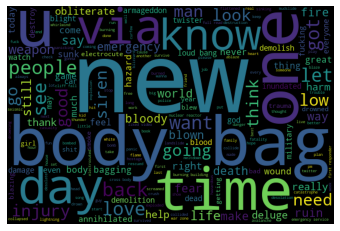

In [27]:
#non-disaster tweets after preprocesing
visualize(0)

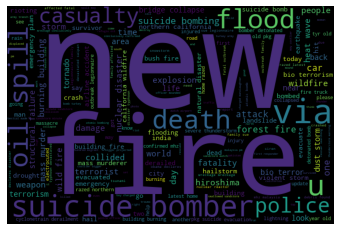

In [28]:
#disaster tweets after preprocesing
visualize(1)

# 3. Converting to vectors and training models

In [29]:
tfidf = TfidfVectorizer(max_features=105325,binary=True, analyzer='word',
            ngram_range=(1, 3), use_idf=True,smooth_idf=1,sublinear_tf=1,)
#max_features=10306
X = tfidf.fit_transform(train_df['text']).toarray()
y=train_df['target']
#norm{‚Äòl1‚Äô
tfidfX_train, tfidfX_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)
print (tfidfX_train.shape)
print (tfidfX_test.shape)
tfidfX_test

(5100, 104974)
(2513, 104974)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
# from imblearn.over_sampling import RandomOverSampler
# RandomOverSampler = RandomOverSampler(random_state = 42)
# tfidfX_train, y_train = RandomOverSampler.fit_resample(tfidfX_train, y_train)
# print (tfidfX_train.shape)

In [31]:
# from imblearn.over_sampling import SMOTE
# SMOTE = SMOTE(random_state = 42)
# tfidfX_train, y_train = SMOTE.fit_resample(tfidfX_train, y_train)
# print(tfidfX_train.shape)


In [32]:
clf1 = LogisticRegression()
clf1.fit(tfidfX_train, y_train)
predictions = clf1.predict_proba(tfidfX_test)
print("Train acc:", clf1.score(tfidfX_train, y_train))
print("Test acc:", clf1.score(tfidfX_test, y_test))

Train acc: 0.9235294117647059
Test acc: 0.7616394747313967


In [33]:
Pr_train = clf1.predict_proba(tfidfX_train)[:, 1]
Pr_test = clf1.predict_proba(tfidfX_test)[:, 1]
print("Train AUC:", roc_auc_score(y_train, Pr_train))
print("Test AUC:", roc_auc_score(y_test, Pr_test))

Train AUC: 0.9901622865508218
Test AUC: 0.8635381707739154


In [34]:
y_predict = clf1.fit(tfidfX_train, y_train).predict(tfidfX_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.72      0.97      0.82      1446
           1       0.92      0.48      0.63      1067

    accuracy                           0.76      2513
   macro avg       0.82      0.72      0.73      2513
weighted avg       0.80      0.76      0.74      2513

[[1404   42]
 [ 557  510]]


In [35]:
clf2 = MultinomialNB()
clf2.fit(tfidfX_train, y_train)
predictions = clf2.predict_proba(tfidfX_test)
print("Train acc:", clf2.score(tfidfX_train, y_train))
print("Test acc:", clf2.score(tfidfX_test, y_test))

Train acc: 0.9694117647058823
Test acc: 0.7910863509749304


In [36]:
Pr_train = clf2.predict_proba(tfidfX_train)[:, 1]
Pr_test = clf2.predict_proba(tfidfX_test)[:, 1]
print("Train AUC:", roc_auc_score(y_train, Pr_train))
print("Test AUC:", roc_auc_score(y_test, Pr_test))

Train AUC: 0.9853798906558644
Test AUC: 0.8570127203506166


In [37]:
y_predict = clf2.fit(tfidfX_train, y_train).predict(tfidfX_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84      1446
           1       0.89      0.58      0.70      1067

    accuracy                           0.79      2513
   macro avg       0.82      0.76      0.77      2513
weighted avg       0.81      0.79      0.78      2513

[[1368   78]
 [ 447  620]]


In [38]:
cvt = CountVectorizer(analyzer='word', binary=True,
            ngram_range=(1, 3) )
X = cvt.fit_transform(train_df['text'])
#.toarray()
y=train_df['target']

cvtX_train, cvtX_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)
print (cvtX_train.shape)
print (cvtX_test.shape)
cvtX_train

(5100, 104974)
(2513, 104974)


<5100x104974 sparse matrix of type '<class 'numpy.int64'>'
	with 125472 stored elements in Compressed Sparse Row format>

In [39]:
from imblearn.over_sampling import RandomOverSampler
RandomOverSampler = RandomOverSampler(
                                      random_state = 42)
cvtX_train, y_train = RandomOverSampler.fit_resample(cvtX_train, y_train)
print (cvtX_train.shape)

(5792, 104974)


In [40]:
# from imblearn.over_sampling import SMOTE
# SMOTE = SMOTE(random_state = 42)
# cvtX_train, y_train = SMOTE.fit_resample(cvtX_train, y_train)
# print(cvtX_train.shape)

In [41]:
clf3 = LogisticRegression()
clf3.fit(cvtX_train, y_train)
predictions = clf3.predict_proba(cvtX_test)######
print("Train acc:", clf3.score(cvtX_train, y_train))
print("Test acc:", clf3.score(cvtX_test, y_test))

Train acc: 0.9854972375690608
Test acc: 0.8002387584560287


In [42]:
Pr_train = clf3.predict_proba(cvtX_train)[:, 1]
Pr_test = clf3.predict_proba(cvtX_test)[:, 1]
print("Train AUC:", roc_auc_score(y_train, Pr_train))
print("Test AUC:", roc_auc_score(y_test, Pr_test))

Train AUC: 0.9993613190035407
Test AUC: 0.8648052799890076


In [43]:
y_predict = clf3.fit(cvtX_train, y_train).predict(cvtX_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84      1446
           1       0.81      0.69      0.75      1067

    accuracy                           0.80      2513
   macro avg       0.80      0.79      0.79      2513
weighted avg       0.80      0.80      0.80      2513

[[1277  169]
 [ 333  734]]


In [44]:
clf4 = MultinomialNB()
clf4.fit(cvtX_train, y_train)
predictions = clf4.predict_proba(cvtX_test)
print("Train acc:", clf4.score(cvtX_train, y_train))
print("Test acc:", clf4.score(cvtX_test, y_test))

Train acc: 0.9772099447513812
Test acc: 0.8014325507361719


In [45]:
Pr_train = clf4.predict_proba(cvtX_train)[:, 1]
Pr_test = clf4.predict_proba(cvtX_test)[:, 1]
print("Train AUC:", roc_auc_score(y_train, Pr_train))
print("Test AUC:", roc_auc_score(y_test, Pr_test))

Train AUC: 0.9914040680038765
Test AUC: 0.8516043352634874


In [46]:
y_predict = clf4.fit(cvtX_train, y_train).predict(cvtX_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1446
           1       0.79      0.73      0.76      1067

    accuracy                           0.80      2513
   macro avg       0.80      0.79      0.79      2513
weighted avg       0.80      0.80      0.80      2513

[[1234  212]
 [ 287  780]]


In [47]:
test_df

id                                               text
0         0                        happened terrible car crash
1         2  heard earthquake different city stay safe ever...
2         3  forest fire spot pond goose fleeing across str...
3         9               apocalypse lighting spokane wildfire
4        11                    typhoon decor kill china taiwan
...     ...                                                ...
3258  10861      earthquake safety los angeles safety fastener
3259  10865  storm worse last hurricane city others hardest...
3260  10868                      green line derailment chicago
3261  10874                meg issue hazardous weather outlook
3262  10875  city calgary activated municipal emergency pla...

[3263 rows x 2 columns]

In [48]:
test_df.text=cvt.transform(test_df.text)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [49]:
test_predcit = clf3.predict(test_df.text)

test_predcit

array([1, 1, 1, ..., 1, 1, 1])

In [50]:
sub_df.target = test_predcit
sub_df.head(50)

id  target
0     0       1
1     2       1
2     3       1
3     9       1
4    11       1
5    12       1
6    21       0
7    22       0
8    27       0
9    29       0
10   30       0
11   35       0
12   42       0
13   43       0
14   45       0
15   46       1
16   47       0
17   51       0
18   58       0
19   60       0
20   69       0
21   70       0
22   72       0
23   75       1
24   84       0
25   87       0
26   88       0
27   90       0
28   94       0
29   99       1
30  101       0
31  103       0
32  106       1
33  108       0
34  111       1
35  115       0
36  116       1
37  122       0
38  123       0
39  124       1
40  125       0
41  127       1
42  140       0
43  142       0
44  147       0
45  148       0
46  150       0
47  152       0
48  154       0
49  155       0

In [51]:
sub_df['target'].value_counts()

0    2135
1    1128
Name: target, dtype: int64

In [52]:
sub_df.to_csv('submission.csv', index=False)



Thank you, feedback is highly appreciated! :)

Please upvote if you found this helpful üëç
